In [1]:
import numpy as np
from numpy import linalg as LA
from scipy.sparse import linalg as SLA
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
%load_ext autotime

## 1-a

In [ ]:
x_2016 = np.genfromtxt('/Users/Amiros/GitHub/Machine Learning for Data Science/hw5_markov_chaines/CFB2016_scores.csv', 
          delimiter=',')

team_names = pd.read_csv('/Users/Amiros/GitHub/Machine Learning for Data Science/hw5_markov_chaines/TeamNames.txt',
                        header = None)

In [ ]:
a_index = x_2016[:,0] -1
b_index = x_2016[:,2] -1

a_score = x_2016[:,1]
b_score = x_2016[:,3]

a_indicator = np.where(a_score>b_score,1,0)
b_indicator = np.where(a_score<b_score,1,0)

In [ ]:
M = np.zeros((760, 760))

M[tuple(a_index), tuple(a_index)] = M[tuple(a_index), tuple(a_index)] + a_indicator + a_score/(a_score+b_score)
M[tuple(b_index), tuple(b_index)] = M[tuple(b_index), tuple(b_index)] + b_indicator + b_score/(a_score+b_score)
M[tuple(a_index), tuple(b_index)] = M[tuple(a_index), tuple(b_index)] + b_indicator + b_score/(a_score+b_score)
M[tuple(b_index), tuple(a_index)] = M[tuple(b_index), tuple(a_index)] + a_indicator + b_score/(a_score+b_score)

M_normalize = M/M.sum(axis=1)

In [ ]:
# function to calculate state at t
def update_w(w_0, t):
    w_arr = []
    w = w_0
    for i in range(t):
        w = np.dot(w, M_normalize)
    w_arr = pd.DataFrame(w.T, index= None, columns = ['score'])
    w_arr['team'] = team_names
    return w_arr

In [ ]:
np.random.seed(42)
w_0 = np.random.uniform(low=0.0, high=1.0, size=(1,760))

w_10 = update_w(w_0, 10)
w_100 = update_w(w_0, 100)
w_1000 = update_w(w_0, 1000)
w_10000 = update_w(w_0, 10000)

In [ ]:
w_10000.sort('score', ascending=False).head(25)

## 1-b

In [ ]:
u = SLA.eigs(M,1, sigma=1)[1].T
w_stationary = u/np.sum(u)

In [ ]:
def print_w(w_0, w_stationary, t=2):
    w = w_0
    x = []
    for i in range(t):
        w = np.dot(w, M_normalize)
        x.append(LA.norm(w_stationary-w, ord=1))
    
    plt.figure(num=None, figsize=(10, 10), dpi=80)
    plt.plot(x, linewidth=2)

print_w(w_0, w_stationary, t=10000)

## 2-a

In [2]:
# load the txt file
with open('nyt_data.csv') as f:
    content = f.readlines()
content = [x.strip() for x in content] 

time: 42.1 ms


In [3]:
# initialize X matrix to the size of 3012 words by 8447 documents <3012X8447>
X = np.zeros((3012, 8447), dtype =float)

time: 2.23 ms


In [4]:
# populate X matrix with the values from the loaded file
# where Xij is the number of times word i appears in document j
for i in range(len(content)):    
    doc = content[i].split(",") 
    
    for element in doc:
        parts = element.split(':')
        parts = list(map(int, parts))
        X[parts[0]-1, i] = parts[1]

time: 2.62 s


In [5]:
k = 25
t = 100

W = np.random.uniform(low=1, high=2, size=(3012,25))
H = np.random.uniform(low=1, high=2, size=(25,8447))

time: 14.9 ms


In [6]:
L = []
for i in range(t):
    H = np.multiply(H, W.T.dot(X)/((W.T.dot(W).dot(H)) + 10**-16))
    W = np.multiply(W, X.dot(H.T)/((W.dot(H).dot(H.T)) + 10**-16))
    l = np.multiply(X, np.log(1/W.dot(H))) + W.dot(H)
    L.append(np.nansum(l))

/Users/Amiros/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in true_divide
/Users/Amiros/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in multiply


time: 2min 56s


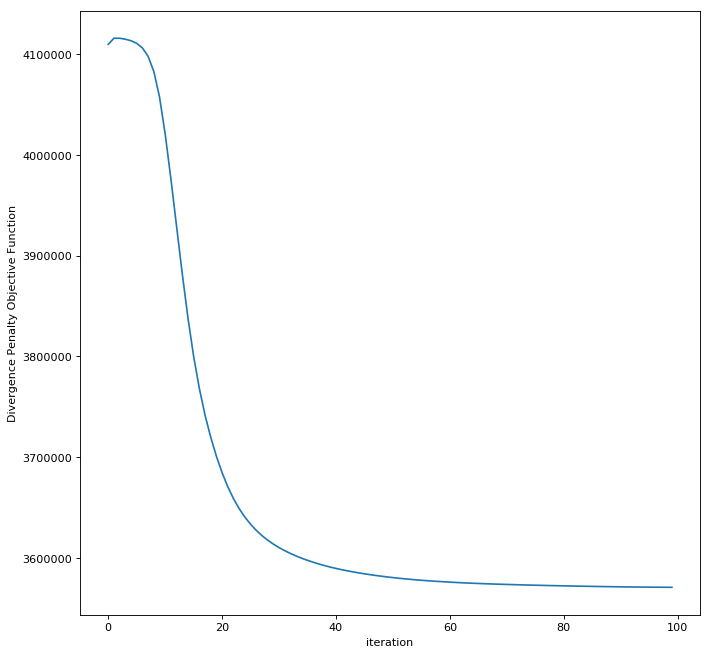

time: 365 ms


In [7]:
plt.figure(num=None, figsize=(10, 10), dpi=80)

plt.plot(L)
plt.xlabel("iteration")
plt.ylabel("Divergence Penalty Objective Function")

## 2-b

In [8]:
from sklearn.preprocessing import normalize

time: 276 ms


In [9]:
with open('nyt_vocab.dat') as l:
    word_list = l.readlines()
word_list = [x.strip() for x in word_list] 
word_list_arr = np.asarray(word_list)

time: 31.8 ms


In [10]:
# normailzie each column to sum to 1
W_norm_df = pd.DataFrame(normalize(W, norm='l1', axis=0))

# rename columns
col_names = []
for i in range(1,26):
    col_names.append('topic_'+ str(i))
    
W_norm_df.columns = col_names

time: 8.99 ms


In [68]:
# function to sort pandas columns
def sorted(s, num):
    tmp = s.order(ascending=False)[:num]
    tmp.index = range(num)
    return tmp

# function to get the index of N largest values
def get_index(x, N):
    tmp = np.argsort(-x)[:N]
    return tmp

time: 4.57 ms


In [94]:
top_values = W_norm_df.apply(lambda x: sorted(x, 10))
top_index = W_norm_df.apply(lambda x: get_index(x, 10))

time: 52.2 ms


/Users/Amiros/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: order is deprecated, use sort_values(...)
  app.launch_new_instance()


In [142]:
def word_values(topic):
    word = []
    value = []
    for i in top_index[topic]:
        word.append(word_list[i])
    value = top_values[topic].tolist()
    dictionary = dict(zip(word, value))
    return dictionary
### need to sort the dictionary #####

time: 4.56 ms


In [143]:
word_values('topic_2')

{'audience': 0.009020132486435949,
 'director': 0.0090957577959921,
 'film': 0.008806686316959658,
 'music': 0.01678919172213834,
 'perform': 0.00781983117414529,
 'performance': 0.011285317212461054,
 'play': 0.016942113921658383,
 'production': 0.008459851426346006,
 'song': 0.007547946645224752,
 'stage': 0.008289070154247099}

time: 4.4 ms
